In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("./Data/event_attendance_data.csv")
df.head()

,event_id,event_type,city,venue_capacity,is_indoor,date,weekday,is_weekend,holiday,start_time_hour,...,promo_channels_count,organizer_reputation,lead_time_days,competing_events_same_day,weather_temp_c,weather_is_rain,weather_rain_mm,historical_avg_attendance,promotion_budget,attendance
0,EVT0000,sports,Mumbai,3000,1,2024-06-24,Monday,0,0,18,...,4,3,69,2,28.3,0,1.9,813,2000.0,2029
1,EVT0001,seminar,Hyderabad,3000,1,2025-04-18,Friday,0,0,14,...,1,3,80,3,27.7,0,0.0,969,0.0,1841
2,EVT0002,concert,Pune,800,1,2024-06-04,Tuesday,0,0,21,...,0,2,41,3,28.5,1,8.6,346,10000.0,800
3,EVT0003,seminar,Pune,500,1,2025-10-18,Saturday,1,0,15,...,2,4,52,1,22.7,0,2.3,253,5000.0,500
4,EVT0004,seminar,Indore,300,0,2024-12-06,Friday,0,0,19,...,2,4,8,4,24.5,0,1.9,90,5000.0,300


In [17]:

df.describe()

,venue_capacity,is_indoor,is_weekend,holiday,start_time_hour,duration_hours,ticket_price,promotion_days,promo_channels_count,organizer_reputation,lead_time_days,competing_events_same_day,weather_temp_c,weather_is_rain,weather_rain_mm,historical_avg_attendance,promotion_budget,attendance
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,843.380000,0.629200,0.284800,0.076800,15.158400,2.418200,442.977200,14.518000,2.004000,3.033600,45.688000,1.95640,25.10308,0.282000,2.812800,336.908800,6002.800000,761.763600
std,744.700616,0.483116,0.451409,0.266327,3.508252,0.771393,391.196405,8.681464,1.411942,1.405582,25.634022,1.41651,4.35418,0.450063,3.112648,345.663497,5999.365726,691.714869
min,150.000000,0.000000,0.000000,0.000000,9.000000,1.500000,0.000000,0.000000,0.000000,1.000000,3.000000,0.00000,9.00000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,300.000000,0.000000,0.000000,0.000000,12.000000,2.000000,134.000000,7.000000,1.000000,2.000000,23.000000,1.00000,22.20000,0.000000,0.000000,100.000000,2000.000000,228.000000
50%,500.000000,1.000000,0.000000,0.000000,15.000000,2.000000,292.000000,15.000000,2.000000,3.000000,46.000000,2.00000,25.10000,0.000000,1.800000,215.000000,5000.000000,500.000000
75%,1200.000000,1.000000,1.000000,0.000000,18.000000,3.000000,673.000000,22.000000,3.000000,4.000000,68.000000,3.00000,28.10000,1.000000,4.700000,439.250000,10000.000000,1200.000000
max,3000.000000,1.000000,1.000000,1.000000,22.000000,4.000000,1498.000000,29.000000,4.000000,5.000000,89.000000,4.00000,39.10000,1.000000,18.100000,2800.000000,20000.000000,3000.000000


In [ ]:
df["date"]=pd.to_datetime(df["date"],errors="coerce")
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"
    

df["time_of_day"] = df["start_time_hour"].apply(get_time_of_day)
df.to_csv("processed_data.csv")

## Visualization of numerical data

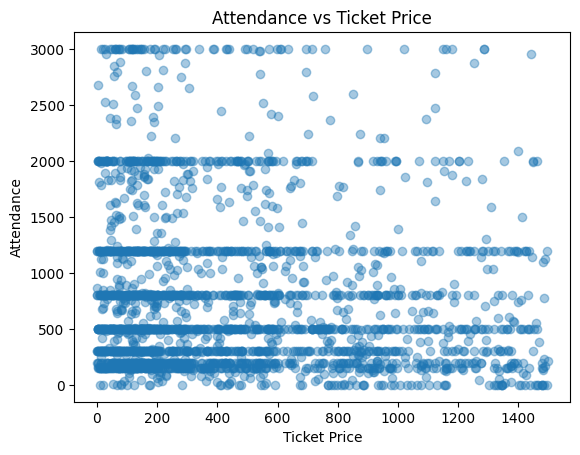

In [19]:
plt.scatter(df["ticket_price"],df["attendance"],alpha=0.4)
plt.ylabel("Attendance")
plt.xlabel("Ticket Price")
plt.title("Attendance vs Ticket Price")
plt.show()

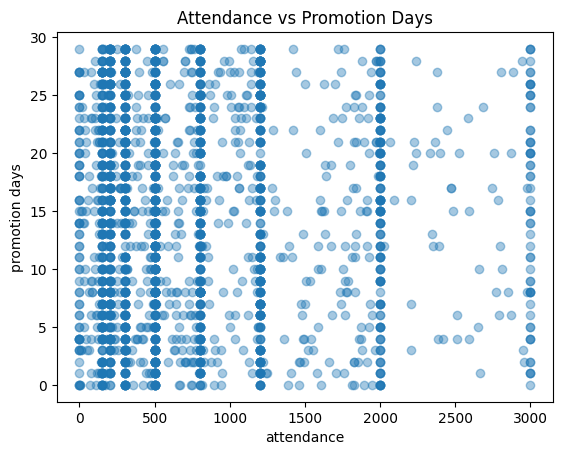

In [20]:
plt.scatter(df["attendance"],df["promotion_days"],alpha=0.4)
plt.xlabel("attendance")
plt.ylabel("promotion days")
plt.title("Attendance vs Promotion Days")
plt.show()

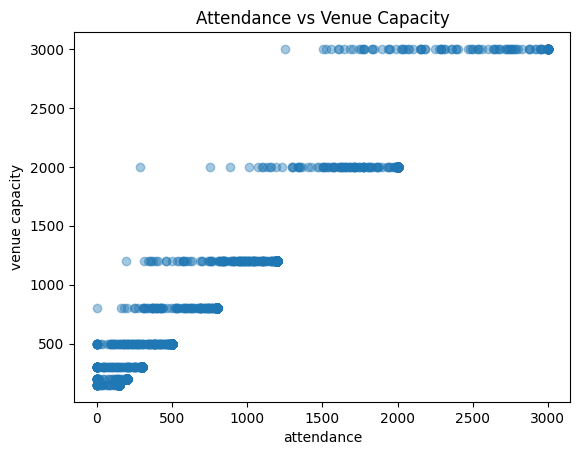

In [63]:
plt.scatter(df["attendance"],df["venue_capacity"],alpha=0.4)
plt.xlabel("attendance")
plt.ylabel("venue capacity")
plt.title("Attendance vs Venue Capacity")
plt.show()

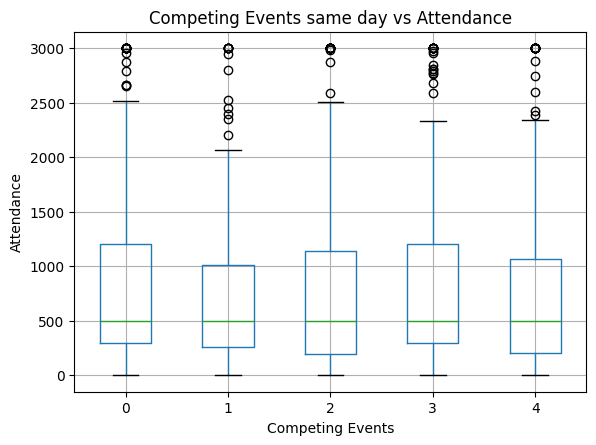

In [7]:
df.boxplot(column="attendance",by="competing_events_same_day")
plt.title("Competing Events same day vs Attendance")
plt.suptitle("")
plt.xlabel("Competing Events")
plt.ylabel("Attendance")             
plt.show()

## Visualization of categorical data 

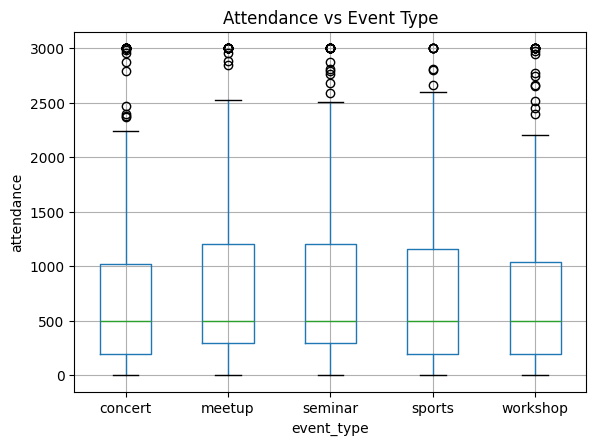

In [8]:
df.boxplot(column="attendance", by="event_type")
plt.title("Attendance vs Event Type")
plt.suptitle("")
plt.ylabel("attendance")
plt.show()

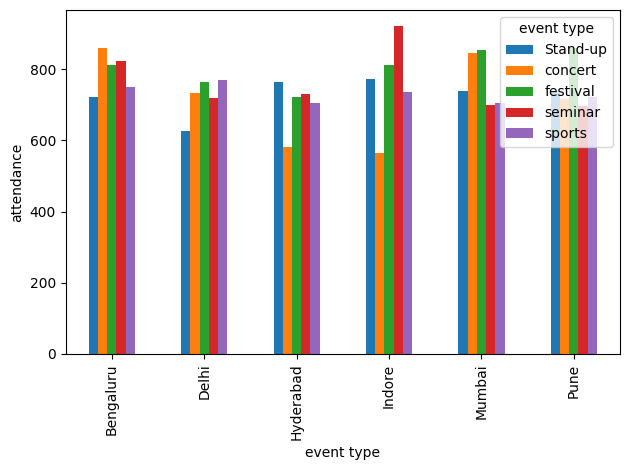

In [10]:
grouped=df.groupby(["city","event_type"])["attendance"].mean().unstack()
grouped.plot(kind="bar",)
# plt.bar(grouped.index,grouped.values)
plt.xlabel("event type")
plt.ylabel("attendance")
plt.legend(title="event type")
plt.tight_layout()
plt.show()

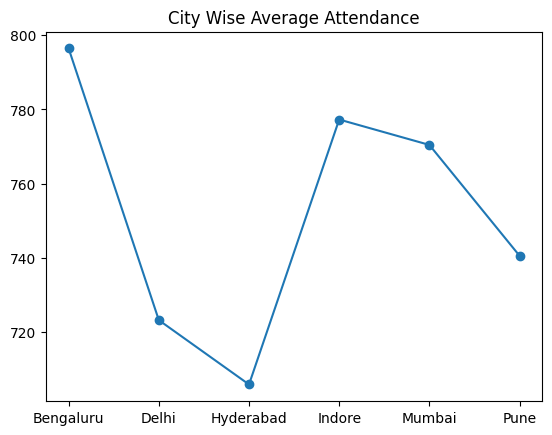

In [11]:
grouped_city=df.groupby("city")["attendance"].mean()
plt.plot(grouped_city,marker='o')
plt.title("City Wise Average Attendance")
plt.show()

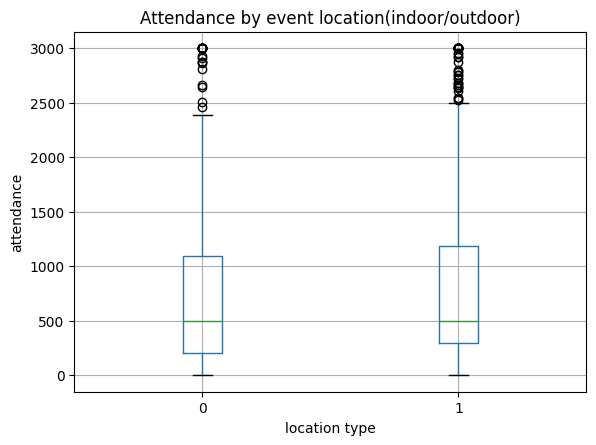

In [12]:
df.boxplot(column="attendance",by="is_indoor")
plt.title("Attendance by event location(indoor/outdoor)")
plt.suptitle("")
plt.xlabel("location type")
plt.ylabel("attendance")
plt.show()

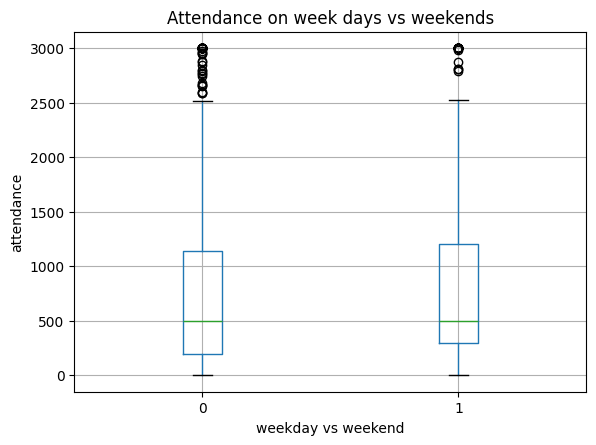

In [12]:
df.boxplot(column="attendance",by="is_weekend")
plt.title("Attendance on week days vs weekends")
plt.suptitle("")
plt.xlabel("weekday vs weekend")
plt.ylabel("attendance")
plt.show()

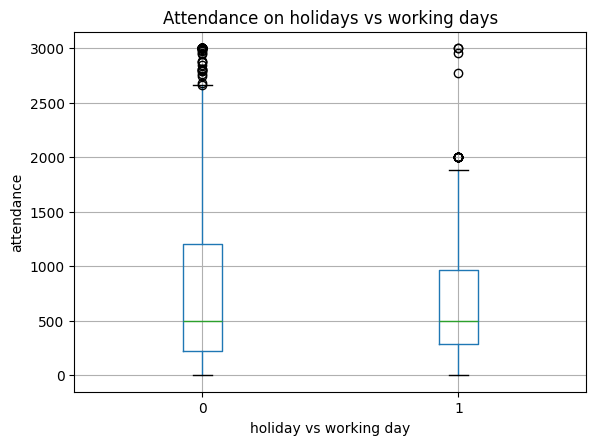

In [13]:
df.boxplot(column="attendance",by="holiday")
plt.title("Attendance on holidays vs working days")
plt.suptitle("")
plt.xlabel("holiday vs working day")
plt.ylabel("attendance")
plt.show()

In [13]:
attendance_by_time=df.groupby(["time_of_day","event_type"])["attendance"].mean().unstack()
attendance_by_time.plot(kind="bar")
plt.title("Attendance based on time of the day")
plt.xlabel("event time")
plt.ylabel("attendance")
plt.show()

KeyError: 'time_of_day'

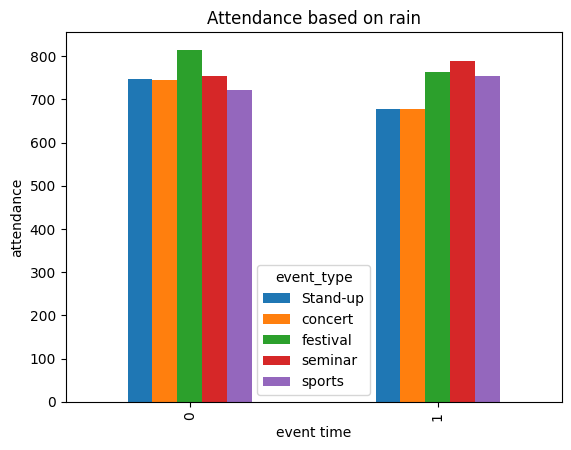

In [14]:
attendance_by_time=df.groupby(["weather_is_rain","event_type"])["attendance"].mean().unstack()
attendance_by_time.plot(kind="bar")
plt.title("Attendance based on rain")
plt.xlabel("event time")
plt.ylabel("attendance")
plt.show()

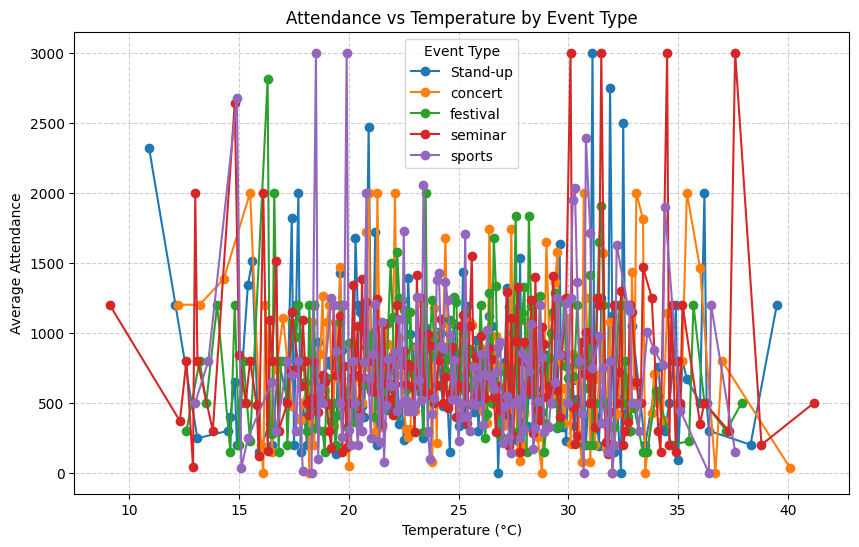

In [15]:
grouped = df.groupby(["event_type", "weather_temp_c"], as_index=False)["attendance"].mean()

# Plot
plt.figure(figsize=(10,6))

# Plot a separate line for each event_type
for event in grouped["event_type"].unique():
    subset = grouped[grouped["event_type"] == event]
    plt.plot(subset["weather_temp_c"], subset["attendance"], marker='o', label=event)

plt.title("Attendance vs Temperature by Event Type")
plt.xlabel("Temperature (°C)")
plt.ylabel("Average Attendance")
plt.legend(title="Event Type")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Data Preprocessing

In [7]:
ohe=OneHotEncoder()
encoded_event_type=ohe.fit_transform(df[["event_type"]])
encoded_city=ohe.fit_transform(df[["city"]])
encoded_time_of_day=ohe.fit_transform(df[["time_of_day"]])


## Feature Scaling - Standardization

In [8]:
standard_scaler=StandardScaler()
features=["venue_capacity","ticket_price","promotion_days","promotion_budget"]
scaled_features=standard_scaler.fit_transform(df[features])
scaled_df=pd.DataFrame(scaled_features,columns=[f"{col}_scaled" for col in features])